# Question 1

Suppose we have a matrix A of shape (n,k) and another matrix B of shape (k,m). There matrix multiplication will yield a matrix C of shape (n,m). <br>
Each element of C, say C<sub> i , j </sub>, will be calculated by the inner product of i<sup>th</sup>-row vector of A and the j<sup>th</sup>-column vector of B.
<br><br>
In this inner product, we have 2 vectors of size <i>k</i>. In dot product, all the corresponding elements of two same-sized vectors are multiplied and then added. So here, since the size of the vectors is <i>k</i>, the number of multiplication operations performed would be <i>k</i>, and the number of addition operations performed would be <i>k-1</i> (no. of addition performed ~ number of summands - 1).
<br><br>
The above calculation holds for each element of matrix C. Now, since the matrix C has <i>n</i>x<i>m</i> elements, the total number of operation will be given as:<br>
<pre>
    number of multiplication operations = m * n * k
    number of addition operations = m * n * (k-1)
</pre>

# Question 2



In [4]:
def matrix_multiplier(matrix1, matrix2):
    m = len(matrix2[0])
    n = len(matrix1)

    output_matrix = [[0 for _ in range(m)] for _ in range(n)]
    
    for i in range(n):
        for j in range(m):
            for k in range(len(matrix2)):
                output_matrix[i][j] += matrix1[i][k] * matrix2[k][j]
    
    return output_matrix

This is our custom matrix multiplication code for list of lists. To compare its performance with numpy, we would need to test it against matrices of slightly big size.

In [39]:
import numpy as np
import time

def compare():
    n, k, m = 100, 100, 100
    matrix1 = np.random.rand(n, k)
    matrix2 = np.random.rand(k, m)

    matrix1_list = matrix1.tolist()
    matrix2_list = matrix2.tolist()

    # Timing using lists of lists
    start_time_lists = time.time()
    result_lists_large = matrix_multiplier(matrix1_list, matrix2_list)
    end_time_lists = time.time()
    time_lists = end_time_lists - start_time_lists

    # Timing using NumPy
    start_time_numpy = time.time()
    result_numpy_large = np.dot(matrix1, matrix2)
    end_time_numpy = time.time()
    time_numpy = end_time_numpy - start_time_numpy

    # Compare timings
    print("Timing using lists of lists:", time_lists)
    print("Timing using NumPy:", time_numpy, "\n")

for _ in range(3):
    compare()

Timing using lists of lists: 0.20803117752075195
Timing using NumPy: 0.0037920475006103516 

Timing using lists of lists: 0.19942331314086914
Timing using NumPy: 0.0010027885437011719 

Timing using lists of lists: 0.18831968307495117
Timing using NumPy: 0.002950429916381836 



From the above few tests is pretty clear that NumPy is significantly faster than the simple Python solution using lists of lists.<br><br>
NumPy is optimized for numerical operations and takes advantage of low-level optimizations, making it more efficient for matrix multiplication. It involves vectorisation as well as can make use of parallel computing. Moreover, the NumPy package integrates C, C++, and Fortran codes in Python. These programming languages have faster execution compared to Python.

# Question 3

__Method 1: Finding Highest Element__ <br>
According to this algorithm, finding the <i>k<sup>th</sup></i> highest number requires <i>k</i> number of passes of the array. <br>
Since for median we would need to find the middlemost number in the array, we need to find (<i>N</i> + 1)/2 highest number when N is odd, and ( <i>N</i>/2 and <i>N</i>/2+1 )/2 when N is even, where <i>N</i> is the length of the array.
Since each pass requires O(<i>N</i>) time, the overall time complexity of this algorithm would be N * O(<i>N</i>) ~ **O(<i> N<sup> 2 </sup></i>)**


__Method 2: Better Method - Sorting__ <br>
A better solution than the above quadratic one would be simply to sort the array (or its copy) and then return the answer according to the parity of the size of the array. 
This algorithm has a better time complexity of **O(<i> N logN </i>)**

In [83]:
import time
import numpy as np

def median1(arr):
    n = len(arr)
    second_max_val, max_val = 0, 0

    for _ in range(n//2 + 1):
        second_max_val = max_val
        max_val = max(arr)
        arr.remove(max_val)
    
    if n % 2 == 1:
        # print(max_val)
        return max_val
    else:
        # print(max_val , second_max_val)
        return (max_val + second_max_val) / 2
    
def median2(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    # print(arr,sorted_arr)
    
    if n % 2 == 1:
        # print(sorted_arr[n//2])
        return sorted_arr[n//2]
    else:
        # print(sorted_arr[n//2 - 1] , sorted_arr[n//2])
        return ( sorted_arr[n//2 - 1] + sorted_arr[n//2] ) / 2
    
numpy_array = np.random.randint(1, 1000, 1000)
python_list = numpy_array.tolist()

# print("NumPy array:", numpy_array)
# print("Python list:", sorted(python_list))
# print("Length of NumPy array:", len(numpy_array))
# print("Length of Python list:", len(python_list))

start_time_method2 = time.time()
median_method2 = median2(python_list)
end_time_method2 = time.time()
time_method2 = end_time_method2 - start_time_method2

start_time_method1 = time.time()
median_method1 = median1(python_list)
end_time_method1 = time.time()
time_method1 = end_time_method1 - start_time_method1

start_time_numpy = time.time()
median_numpy = np.median(numpy_array)
end_time_numpy = time.time()
time_numpy = end_time_numpy - start_time_numpy

print("Median using Method 1:", median_method1)
print("Time taken by Method 1:", time_method1)

print("\nMedian using Method 2:", median_method2)
print("Time taken by Method 2:", time_method2)

print("\nMedian using NumPy routine:", median_numpy)
print("Time taken by NumPy routine:", time_numpy)

Median using Method 1: 516.0
Time taken by Method 1: 0.010155677795410156

Median using Method 2: 516.0
Time taken by Method 2: 0.0009968280792236328

Median using NumPy routine: 516.0
Time taken by NumPy routine: 0.0009999275207519531


As our initial guess, Method-1 is slowest of all the methods. But surprisingly, on testing few times, method-2 shows to be comparable to the numpy implementation in speed.

# Question 4

The given function is $ f(x,y) = x^2y + y^3sin(x) $

Partial Derivative w.r.t x : $ 2xy + y^3cos(x) $ <br>
Partial Derivative w.r.t y : $ x^2 + 3y^2sin(x) $

# Question 5

In [45]:
import jax
import jax.numpy as jnp

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

# Use JAX to calculate the gradient
grad_f = jax.grad(f, argnums=(0, 1))

# custom gradient functions
def df_dx(x,y):
    return 2*x*y + y**3 * jnp.cos(x)

def df_dy(x,y):
    return x**2 + 3 * y**2 * jnp.sin(x)

def compare(x_val,y_val):

    gradient_x, gradient_y = grad_f(x_val, y_val)

    print(f"\nFunction value at ({x_val}, {y_val}): {f(x_val, y_val)}")

    print("Using JAX -")
    print(f"Gradient with respect to x: {gradient_x}")
    print(f"Gradient with respect to y: {gradient_y}")

    print("Using derived formula -")
    print(f"Gradient with respect to x: {df_dx(x_val,y_val)}")
    print(f"Gradient with respect to y: {df_dy(x_val,y_val)}")

for x,y in [ (2.0,3.0) , (4.0,5.0), (3.5,6.5)]:
    compare(x,y)


Function value at (2.0, 3.0): 36.551029205322266
Using JAX -
Gradient with respect to x: 0.7640352249145508
Gradient with respect to y: 28.551029205322266
Using derived formula -
Gradient with respect to x: 0.7640352249145508
Gradient with respect to y: 28.551029205322266

Function value at (4.0, 5.0): -14.600311279296875
Using JAX -
Gradient with respect to x: -41.70545196533203
Gradient with respect to y: -40.760189056396484
Using derived formula -
Gradient with respect to x: -41.70545196533203
Gradient with respect to y: -40.760189056396484

Function value at (3.5, 6.5): -16.708847045898438
Using JAX -
Gradient with respect to x: -211.67440795898438
Gradient with respect to y: -32.21177291870117
Using derived formula -
Gradient with respect to x: -211.67440795898438
Gradient with respect to y: -32.21177291870117


# Question 6

In [48]:
from sympy import symbols, diff, sin

x, y = symbols('x y')

f = x**2 * y + y**3 * sin(x)

# Calculate the partial derivatives
df_dx = diff(f, x)
df_dy = diff(f, y)

print("Partial Derivative wrt x:", df_dx)
print("Partial Derivative wrt y:", df_dy)

Partial Derivative wrt x: 2*x*y + y**3*cos(x)
Partial Derivative wrt y: x**2 + 3*y**2*sin(x)


# Question 7

In [57]:
## roll number is used as key in a branch
students_marks = {
    2022: {
        'Branch 1': {
            3: {
                'Name': 'Arjun',
                'Marks': {'Maths': 100, 'English': 70, "Science": 80}
            },
            2 : {
                'Name': 'Bheem',
                'Marks': {'Maths': 60, 'English': 90, "Science": 85}
            }
        },
        'Branch 2': {
            1 : {
                'Name': 'Yudhishthir',
                'Marks': {'Maths': 95, 'English': 97, "Science": 88}
            }
        }
    },

    2023: {
        'Branch 1': {
            5 : {
                'Name': 'Sahedev',
                'Marks': {'Maths': 75, 'English': 79, "Science": 68}
            }
        },
        'Branch 2': {
            4 : {
                'Name': 'Nakul',
                'Marks': {'Maths': 77, 'English': 82, "Science": 70}
            }
        }
    },

    ## similarly rest data can be filled
    2024: {
        'Branch 1': {},
        'Branch 2': {}
    },
    2025: {
        'Branch 1': {},
        'Branch 2': {}
    }
}

students_marks

{2022: {'Branch 1': {3: {'Name': 'Arjun',
    'Marks': {'Maths': 100, 'English': 70, 'Science': 80}},
   2: {'Name': 'Bheem', 'Marks': {'Maths': 60, 'English': 90, 'Science': 85}}},
  'Branch 2': {1: {'Name': 'Yudhishthir',
    'Marks': {'Maths': 95, 'English': 97, 'Science': 88}}}},
 2023: {'Branch 1': {5: {'Name': 'Sahedev',
    'Marks': {'Maths': 75, 'English': 79, 'Science': 68}}},
  'Branch 2': {4: {'Name': 'Nakul',
    'Marks': {'Maths': 77, 'English': 82, 'Science': 70}}}},
 2024: {'Branch 1': {}, 'Branch 2': {}},
 2025: {'Branch 1': {}, 'Branch 2': {}}}

# Question 8

In [56]:
class year:
    def __init__(self, branches):
        self.branches = branches

class branch:
    def __init__(self, students):
        self.students = students

class student:
    def __init__(self, name, subjects):
        self.name = name
        self.subjects = subjects

class subject:
    def __init__(self,marks):
        self.marks = marks


Maths_21 = subject(80)
English_21 = subject(75)
Science_21 = subject(70)
Maths_22 = subject(70)
English_22 = subject(80)
Science_22 = subject(65)

_3 = student("Arjun", [Maths_21, English_21, Science_21])
_2 = student("Bheem", [Maths_21, English_21, Science_21])
_1 = student("Yudhi", [Maths_21, English_21, Science_21])
_4 = student("Nakul", [Maths_22, English_22, Science_22])
_5 = student("Sahedev", [Maths_22, English_22, Science_22])

branch1_21 = branch([_2,_3])
branch2_21 = branch([_1])
branch1_22 = branch([_5])
branch2_22 = branch([_4])

batch_2021 = year([branch1_21,branch2_21])
batch_2022 = year([branch1_22,branch2_22])
# batch_2023 = batch([branch1_23,branch2_23])
# batch_2024 =

database = [batch_2021, batch_2022]

print(database)
print(database[0])
print(database[0].branches)
print(database[0].branches[0].students)
print(database[0].branches[0].students[0].name)
print(database[0].branches[0].students[0].subjects)
print(database[0].branches[0].students[0].subjects[0].marks, "\n")


## Better lookup would be using dictionaries
marks21 = {"Maths":Maths_21, "English":English_21, "Science":Science_21}
marks22 = {"Maths":Maths_22, "English":English_22, "Science":Science_22}

# branch1_21 = branch({2:student("Bheem", [Maths_21, English_21, Science_21]), 3:student("Arjun", [Maths_21, English_21, Science_21])})
branch1_21 = branch({2:student("Bheem", marks21), 3:student("Arjun", marks21)})
branch2_21 = branch({1 : student("Yudhi", marks21)})
branch1_22 = branch({5 : student("Sahedev", marks22)})
branch2_22 = branch({4 : student("Nakul", marks22)})

database = {
    "batch_2021": year({1 : branch1_21, 2: branch2_21}),
    "batch_2022": year({1 : branch1_22, 2: branch2_22})
}

print(database)
print(database['batch_2021'].branches)
print(database['batch_2021'].branches.items())
print(database['batch_2021'].branches[1].students)
print(database['batch_2021'].branches[1].students[2].name)
print(database['batch_2021'].branches[1].students[2].subjects)
print(list(database['batch_2021'].branches[1].students[2].subjects.keys())[0])
print(database['batch_2021'].branches[1].students[2].subjects["Maths"].marks)

[<__main__.year object at 0x000002B0CDD4FEE0>, <__main__.year object at 0x000002B0CDD4FAC0>]
[<__main__.branch object at 0x000002B0CDD4FA30>, <__main__.branch object at 0x000002B0CDD4E1D0>]
[<__main__.student object at 0x000002B0CDBAA770>, <__main__.student object at 0x000002B0CDBAABF0>]
Bheem
[<__main__.subject object at 0x000002B0CDBA90C0>, <__main__.subject object at 0x000002B0CDBAA890>, <__main__.subject object at 0x000002B0CDBA9240>]
80 

{'batch_2021': <__main__.year object at 0x000002B0CDD09750>, 'batch_2022': <__main__.year object at 0x000002B0CDD0A170>}
{1: <__main__.branch object at 0x000002B0CDD0B3A0>, 2: <__main__.branch object at 0x000002B0CDD090F0>}
dict_items([(1, <__main__.branch object at 0x000002B0CDD0B3A0>), (2, <__main__.branch object at 0x000002B0CDD090F0>)])
{2: <__main__.student object at 0x000002B0CDD4C940>, 3: <__main__.student object at 0x000002B0CDD0B5B0>}
Bheem
{'Maths': <__main__.subject object at 0x000002B0CDBA90C0>, 'English': <__main__.subject object at 

# Question 9

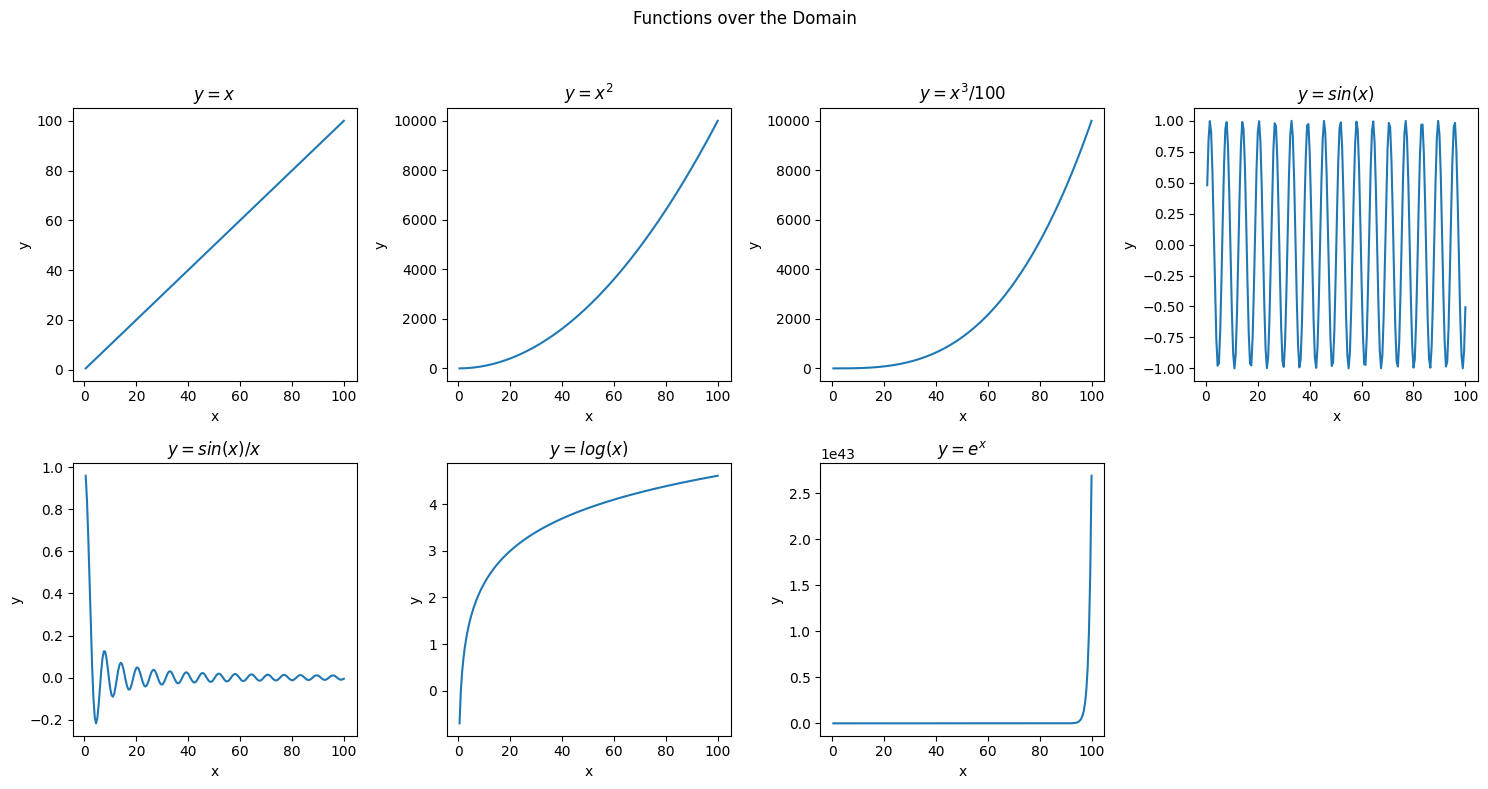

In [58]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.arange(0.5, 100.5, 0.5)

def function1(x):
    return x

def function2(x):
    return x**2

def function3(x):
    return x**3/100

def function4(x):
    return np.sin(x)

def function5(x):
    return np.sin(x)/x

def function6(x):
    return np.log(x)

def function7(x):
    return np.exp(x)

functions = [function1, function2, function3, function4, function5, function6, function7]
function_names = ["x" , "x^2", "x^3/100", "sin(x)", "sin(x)/x", "log(x)", "e^x"]

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
fig.suptitle('Functions over the Domain')

for i, ax in enumerate(axes.flatten()):
    if i>6:
        continue
    y_values = functions[i](x_values)
    ax.plot(x_values, y_values)
    # ax.set_title(f'$y = {functions[i].__name__}$')
    ax.set_title(f'$y = {function_names[i]}$')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

fig.delaxes(axes[1, 3])
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Question 10

In [60]:
import pandas as pd

matrix_np = np.random.uniform(1,2, size = (20,5))
# print(matrix_np)

matrix_pd = pd.DataFrame(matrix_np, columns=['a', 'b', 'c', 'd', 'e'])
print(matrix_pd)
# print(matrix_pd.std())
# print(matrix_pd.mean())
# print(matrix_pd.mean(axis=1))

max_std_column = matrix_pd.std().idxmax()
min_mean_row = matrix_pd.mean(axis=1).idxmin()

print("\nColumn with the highest standard deviation:", max_std_column)
print("Row with the lowest mean:", min_mean_row)

           a         b         c         d         e
0   1.758274  1.003284  1.290200  1.297515  1.353853
1   1.136071  1.269244  1.781978  1.884840  1.326481
2   1.851847  1.992624  1.394013  1.600225  1.126455
3   1.759620  1.884781  1.569061  1.110940  1.873567
4   1.791964  1.596386  1.410330  1.514752  1.847494
5   1.829213  1.626958  1.825494  1.868840  1.139741
6   1.952720  1.563712  1.253210  1.614602  1.465365
7   1.743619  1.733816  1.027068  1.432033  1.700165
8   1.851869  1.791213  1.403587  1.917153  1.793870
9   1.762417  1.722187  1.751920  1.865899  1.269788
10  1.622426  1.852195  1.854128  1.280526  1.182733
11  1.401904  1.147611  1.541182  1.320442  1.471696
12  1.482969  1.929972  1.878333  1.425073  1.153715
13  1.165299  1.083107  1.502730  1.188341  1.296567
14  1.997057  1.789441  1.389879  1.603974  1.833017
15  1.788766  1.531072  1.323031  1.982566  1.346660
16  1.484565  1.013508  1.824969  1.803552  1.304106
17  1.894363  1.574888  1.397983  1.316777  1.

# Question 11

In [61]:
matrix_pd['f'] = matrix_pd[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
matrix_pd['g'] = np.where(matrix_pd['f'] < 8, 'LT8', 'GT8')

num_rows_LT8 = matrix_pd[matrix_pd['g'] == 'LT8'].shape[0]
std_LT8 = matrix_pd[matrix_pd['g'] == 'LT8']['f'].std()
std_GT8 = matrix_pd[matrix_pd['g'] == 'GT8']['f'].std()

print(matrix_pd)

print("\nNumber of rows where value in column 'g' is 'LT8':", num_rows_LT8)
print("Standard deviation of column 'f' for 'LT8' rows:", std_LT8)
print("Standard deviation of column 'f' for 'GT8' rows:", std_GT8)

           a         b         c         d         e         f    g
0   1.758274  1.003284  1.290200  1.297515  1.353853  6.703125  LT8
1   1.136071  1.269244  1.781978  1.884840  1.326481  7.398613  LT8
2   1.851847  1.992624  1.394013  1.600225  1.126455  7.965164  LT8
3   1.759620  1.884781  1.569061  1.110940  1.873567  8.197969  GT8
4   1.791964  1.596386  1.410330  1.514752  1.847494  8.160926  GT8
5   1.829213  1.626958  1.825494  1.868840  1.139741  8.290247  GT8
6   1.952720  1.563712  1.253210  1.614602  1.465365  7.849610  LT8
7   1.743619  1.733816  1.027068  1.432033  1.700165  7.636702  LT8
8   1.851869  1.791213  1.403587  1.917153  1.793870  8.757692  GT8
9   1.762417  1.722187  1.751920  1.865899  1.269788  8.372211  GT8
10  1.622426  1.852195  1.854128  1.280526  1.182733  7.792008  LT8
11  1.401904  1.147611  1.541182  1.320442  1.471696  6.882834  LT8
12  1.482969  1.929972  1.878333  1.425073  1.153715  7.870063  LT8
13  1.165299  1.083107  1.502730  1.188341  1.29

# Question 12

Broadcasting is a powerful feature in NumPy that allows for operations between arrays of different shapes and sizes. It automatically adjusts the dimensions of smaller arrays to perform element-wise operations with larger arrays.

In [40]:
a = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
b = 10

print("Scalar addition to a matrix:\n", a+b)

Scalar addition to a matrix:
 [[11 12 13]
 [14 15 16]
 [17 18 19]]


In [14]:
a = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

b = np.array([10, 20, 30])

'''
print("\nColumn Vector Addition: \n", a+b.T)

print("\nIdentifying issue -")
print("Shape of b", b.size)
print("Shape of b_transpose", b.T.size)

b = b.reshape(-1, 1)    # Reshape b to a column vector
# print(b)
print("Shape of b", b.size)
print("\nColumn Vector Addition: \n", a+b.T)
'''

print("Vector Addition: \n", a+b)

Vector Addition: 
 [[11 22 33]
 [14 25 36]
 [17 28 39]]


In [18]:
a = np.array([[10,20,30]])

b = np.array([[100],
              [200],
              [300]])

print("2d-array generation from vectors: \n", a+b)

2d-array generation from vectors: 
 [[110 120 130]
 [210 220 230]
 [310 320 330]]


# Question 13

In [13]:
import numpy as np

def arg_min(arr):
    min = arr[0]
    min_index = 0

    # arr_fl = arr.flatten()
    for i in range(1,len(arr)):
        if arr[i]<min:
            min = arr[i]
            min_index = i

    return min_index

np_arr = np.random.randint(1,100,10)
print(np_arr)

min_arg = arg_min(np_arr)
print("arg_min of array: ", min_arg)

if ( min_arg == np.argmin(np_arr)):
    print("Verified")

[57 46 34 90 58 51 31 31  3 13]
arg_min of array:  8
Verified
